In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings

In [2]:
#The below code is used to load the dataset.
data = pd.read_excel('IND.xlsx')
data

,Year,GDP(billions),Human Development Index,Inflation Index,Credit Transfers (in million),Direct Debits (in million),Cheques (in million),Card & e-money (in million),Total digital-payments
0,2012,1827.64,0.600,108.983,518,177,1313,947,1642
1,2013,1856.72,0.607,119.227,915,193,1257,1279,2387
2,2014,2039.13,0.616,126.142,1457,230,1197,1760,3447
3,2015,2103.59,0.624,132.323,2874,289,1096,2736,5899
4,2016,2294.12,0.636,138.278,3858,365,1207,5497,9720
5,2017,2651.46,0.640,143.259,5879,379,1171,8258,14516
6,2018,2701.11,0.642,148.171,11854,534,1124,10839,23227
7,2019,2870.50,0.645,155.227,18486,826,1070,12313,31625


In [3]:
%matplotlib inline

In [4]:
# Count Rows
data.count()

Year                             8
GDP(billions)                    8
Human Development Index          8
Inflation Index                  8
Credit Transfers (in million)    8
Direct Debits (in million)       8
Cheques (in million)             8
Card & e-money (in million)      8
Total digital-payments           8
dtype: int64

### By this we will know the data and understand what kind of data it is.

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           8 non-null      int64  
 1   GDP(billions)                  8 non-null      float64
 2   Human Development Index        8 non-null      float64
 3   Inflation Index                8 non-null      float64
 4   Credit Transfers (in million)  8 non-null      int64  
 5   Direct Debits (in million)     8 non-null      int64  
 6   Cheques (in million)           8 non-null      int64  
 7   Card & e-money (in million)    8 non-null      int64  
 8   Total digital-payments         8 non-null      int64  
dtypes: float64(3), int64(6)
memory usage: 704.0 bytes


,Year,GDP(billions),Human Development Index,Inflation Index,Credit Transfers (in million),Direct Debits (in million),Cheques (in million),Card & e-money (in million),Total digital-payments
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2015.50000,2293.033750,0.626250,133.951250,5730.125000,374.125000,1179.375000,5453.625000,11557.875000
std,2.44949,402.808202,0.017128,15.418294,6330.311783,216.972966,81.945866,4514.820102,10897.083207
min,2012.00000,1827.640000,0.600000,108.983000,518.000000,177.000000,1070.000000,947.000000,1642.000000
25%,2013.75000,1993.527500,0.613750,124.413250,1321.500000,220.750000,1117.000000,1639.750000,3182.000000
50%,2015.50000,2198.855000,0.630000,135.300500,3366.000000,327.000000,1184.000000,4116.500000,7809.500000
75%,2017.25000,2663.872500,0.640500,144.487000,7372.750000,417.750000,1219.500000,8903.250000,16693.750000
max,2019.00000,2870.500000,0.645000,155.227000,18486.000000,826.000000,1313.000000,12313.000000,31625.000000


### WE are calculating the correlation table for all the variables.

In [6]:
corr = data.corr().iloc[0:9,0:9]
corr

,Year,GDP(billions),Human Development Index,Inflation Index,Credit Transfers (in million),Direct Debits (in million),Cheques (in million),Card & e-money (in million),Total digital-payments
Year,1.000000,0.980892,0.977259,0.994320,0.896983,0.910004,-0.830202,0.966355,0.939568
GDP(billions),0.980892,1.000000,0.949142,0.960690,0.900262,0.901306,-0.750745,0.984692,0.948897
Human Development Index,0.977259,0.949142,1.000000,0.982180,0.789434,0.818752,-0.790220,0.914561,0.853815
Inflation Index,0.994320,0.960690,0.982180,1.000000,0.864751,0.885927,-0.854126,0.935953,0.907768
Credit Transfers (in million),0.896983,0.900262,0.789434,0.864751,1.000000,0.990114,-0.742090,0.939454,0.989862
Direct Debits (in million),0.910004,0.901306,0.818752,0.885927,0.990114,1.000000,-0.758582,0.930709,0.980693
Cheques (in million),-0.830202,-0.750745,-0.790220,-0.854126,-0.742090,-0.758582,1.000000,-0.708750,-0.739843
Card & e-money (in million),0.966355,0.984692,0.914561,0.935953,0.939454,0.930709,-0.708750,1.000000,0.978592
Total digital-payments,0.939568,0.948897,0.853815,0.907768,0.989862,0.980693,-0.739843,0.978592,1.000000


In [7]:
data.isnull().sum() #says about null values and gaps in dataset. there are no null values.

Year                             0
GDP(billions)                    0
Human Development Index          0
Inflation Index                  0
Credit Transfers (in million)    0
Direct Debits (in million)       0
Cheques (in million)             0
Card & e-money (in million)      0
Total digital-payments           0
dtype: int64

Text(0, 0.5, 'GDP(billions)')

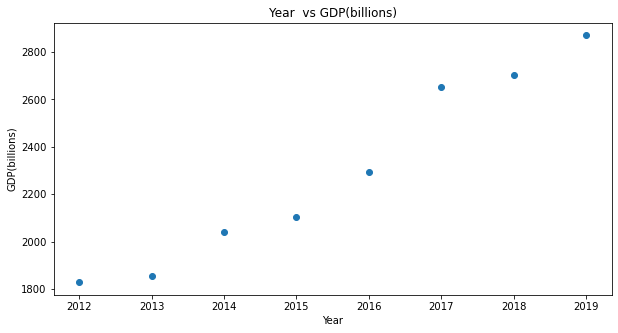

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(x=data['Year'],y=data['GDP(billions)'])
plt.title('Year  vs GDP(billions)')
plt.xlabel('Year')
plt.ylabel('GDP(billions)')

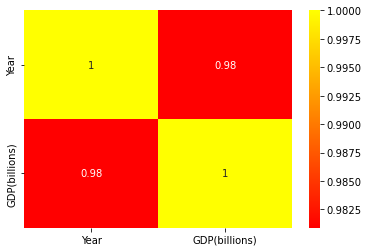

By the graph we can see there is 98% corelation between Year and GDP(billions)
the above theme is che guevara captain theme


In [9]:
relation = data.corr().iloc[0:2,0:2]
sns.heatmap(relation, annot=True, cmap='autumn') 
plt.show()
print('By the graph we can see there is 98% corelation between Year and GDP(billions)')
print('the above theme is che guevara captain theme')

Text(0, 0.5, 'GDP(billions)')

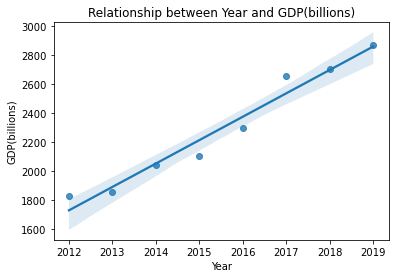

In [10]:
sns.regplot(x=data['Year'],y=data['GDP(billions)'],data=data)
plt.title('Relationship between Year and GDP(billions)')
plt.xlabel('Year')
plt.ylabel('GDP(billions)')

# Preparing/training the Model

In [11]:
x= data[['Year']].values
y=data[['GDP(billions)']].values

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
# importing regression algorithm 

In [14]:
lm.fit(xtrain,ytrain)

LinearRegression()

Text(0, 0.5, 'GDP(billions)')

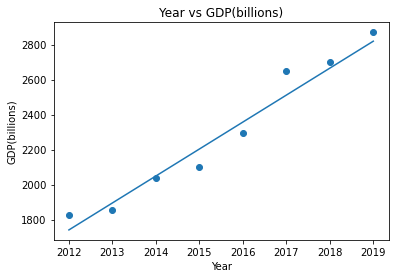

In [15]:
# Plotting the regression line
line = lm.coef_*x+lm.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.title('Year vs GDP(billions)')
plt.xlabel('Year')
plt.ylabel('GDP(billions)')

In [16]:
print('Training score')
print(lm.score(xtrain, ytrain))
print('Test score')
print(lm.score(xtest, ytest))
print('here there is good accuracy, the maximum accuracy is "1" ')
# the both values should similar or near, othervice there will be accuracy error

Training score
0.9688753051409749
Test score
0.9331129792992565
here there is good accuracy, the maximum accuracy is "1" 


## here we trained x label as time and y label as the GDP. 

In [17]:
ypred= lm.predict(xtest)

In [18]:
ytest # these are test case values

array([[1856.72],
       [2651.46]])

In [19]:
ypred # these are predicted values

array([[1895.3478],
       [2511.3486]])

In [20]:
print("Year  = ", 2020)
print("The GDP to be predicted = ",lm.predict([[2020]])[0][0])

Year  =  2020
The GDP to be predicted =  2973.349200000055


# The predicted GDP of both 2020 and 2021 according to the variable Year as reference 

In [21]:
print("Year  = ", 2021)
print("The GDP to be predicted = ",lm.predict([[2021]])[0])

Year  =  2021
The GDP to be predicted =  [3127.3494]


In [22]:
from sklearn import metrics  
print('MAE: ',metrics.mean_absolute_error(ytest, ypred))
print('MSE: ', metrics.mean_squared_error(ytest, ypred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

MAE:  89.36960000001011
MSE:  10561.65567139808
RMSE:  102.76991617880245


C:\Users\yeshw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yeshw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

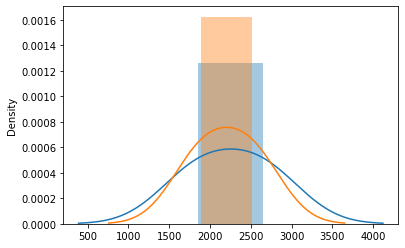

In [23]:
sns.distplot([ytest])
sns.distplot([ypred])
# we compare both the graphs

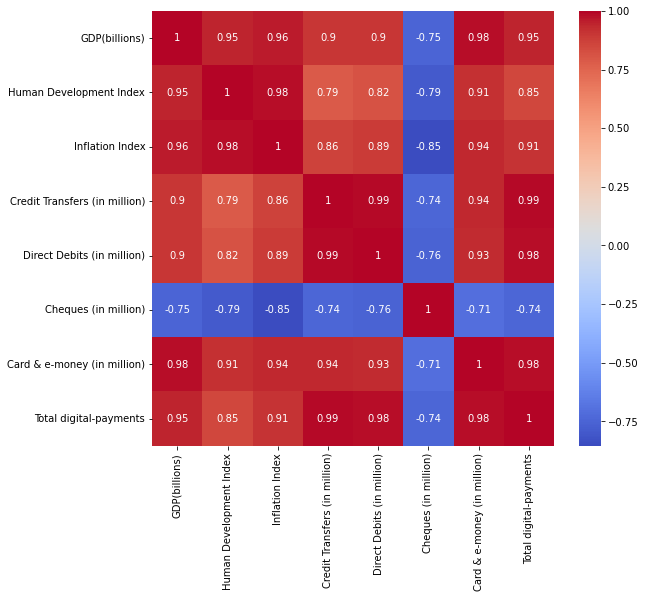

In [24]:
plt.figure(figsize=(9, 8))
relation = data.corr().iloc[1:9,1:9]
sns.heatmap(relation, annot = True, cmap = "coolwarm")
plt.show()

# Re-training the model with digital payments data as x label and Y as GDP

In [25]:
x= data[['Total digital-payments']].values
y=data[['GDP(billions)']].values

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
# importing regression algorithm as ml

In [27]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [28]:
print('Training score')
print(lm.score(xtrain, ytrain))
print('Test score')
print(lm.score(xtest, ytest))
# the both values should similar or near, othervice there will be accuracy error

Training score
0.965574071830323
Test score
0.7060610011124271


Text(0, 0.5, 'GDP(billions)')

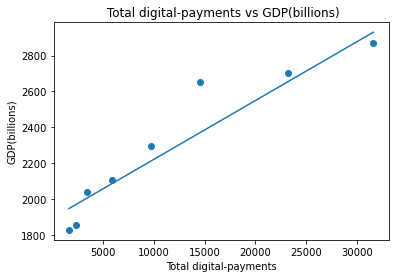

In [29]:
# Plotting the regression line
line = lm.coef_*x+lm.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.title(' Total digital-payments vs GDP(billions)')
plt.xlabel('Total digital-payments')
plt.ylabel('GDP(billions)')

<AxesSubplot:xlabel='Total digital-payments', ylabel='GDP(billions)'>

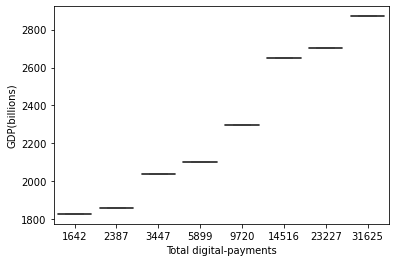

In [30]:
sns.boxplot(x="Total digital-payments", y="GDP(billions)", data=data) #boxplot

In [31]:
ypred= lm.predict(xtest)
ytest # these are test case values

array([[1856.72],
       [2651.46]])

In [32]:
ypred # these are predicted values

array([[1971.16325319],
       [2369.09429311]])

# prediction of GDP with the help of the Digital Payments

In [33]:
print("Total digital-payments in 2020 by RBI= ",18639)
print("The GDP to be predicted in 2020= ",lm.predict([[18639]])[0][0], "in Billions")

Total digital-payments in 2020 by RBI=  18639
The GDP to be predicted in 2020=  2504.3626315989686 in Billions


In [34]:
import math
model_mse = mean_squared_error(ytest, ypred)
model_mae = mean_absolute_error(ytest, ypred)
model_rmse =  math.sqrt(model_mse)
model_r2 = r2_score(ytest, ypred)

print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))
print("R2: {:.2}".format(model_r2))
# calculation of error rate

MSE 4.64e+04
MAE 1.98e+02
RMSE 2.15e+02
R2: 0.71


## visualizing all three economy indexes with reference to the Total Digital-payments.

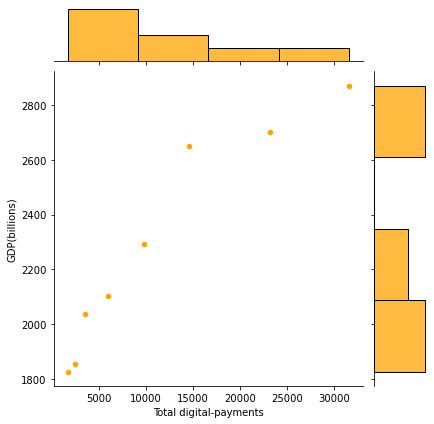

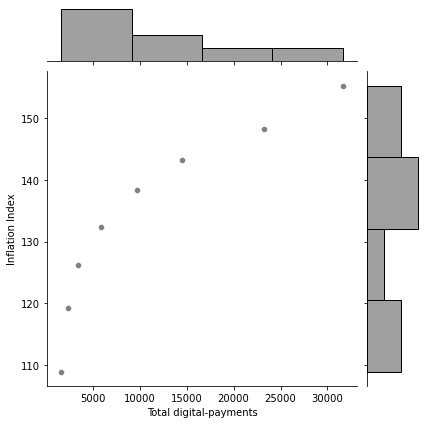

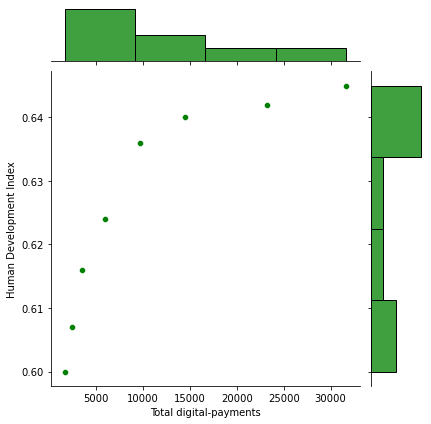

In [35]:
sns.jointplot(data=data, x="Total digital-payments", y="GDP(billions)", color='orange')
sns.jointplot(data=data, x="Total digital-payments", y="Inflation Index", color='grey')
sns.jointplot(data=data, x="Total digital-payments", y="Human Development Index", color='green')

## OLS regression for finding relationships between the variables.

In [54]:
x= data[['Total digital-payments']].values
y=data[['GDP(billions)']].values
model = sm.OLS(y,x)

In [55]:
fit = model.fit()

In [56]:
warnings.filterwarnings("ignore")
fit.summary()
# results of our model; used for model evaluation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              17.03
Date:                Sun, 03 Jul 2022   Prob (F-statistic):                     0.00442
Time:                        11:56:59   Log-Likelihood:                         -68.426
No. Observations:                   8   AIC:                                      138.9
Df Residuals:                       7   BIC:                                      138.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1269      0.031      4.127      0.004       0.054       0.200
==============================================================================
Omnibus:                        3.836   Durbin-Watson:                   0.170
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                1.619
Skew:                          -1.095   Prob(JB):                        0.445
Kurtosis:                       2.756   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ## Element Description 
## R-squared   =   The coefficient of determination. A statistical measure of how well the regression line approximates the real data points. If our linear regression model is good then, we have R*2 value closer to '1'. If it is '-ve' then that model is a bad model

### Adj. R-squared   =   The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals(says how the variables are related to the model and Both R*2 and ADJ,R*2 should be similar )
#### F-statistic  = A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals     
#### Prob (F-statistic) =  The probability that you would get the above statistic, given the null hypothesis that they are unrelated
#### Log-likelihood	The log of the likelihood function.
#### AIC    =  The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.
#### BIC    =  The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.
#### The second table reports for each of the coefficients

# Description

#### Model  = The name of the term in the model. 
#### coef  = The estimated value of the coefficient 
#### std err  = The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.

### t   =  The t-statistic value. This is a measure of how statistically significant the coefficient is. t test looks the relationship between the target variable and predicted values.

#### P > |t|   =  P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
#### [95.0% Conf. Interval]	The lower and upper values of the 95% confidence interval 

fit.params

## Element Description
### Dep. Variable  = Which variable is the response in the model
### Model  = What model you are using in the fit
### Method  = How the parameters of the model were calculated
### No. Observations  = The number of observations (examples)
### DF Residuals  = Degrees of freedom of the residuals. Number of observations – number of parameters
### DF Model  = Number of parameters in the model (not including the constant term if present)

##     ----------------------------------------------------------------------------------------------------
##     ----------------------------------------------------------------------------------------------------
##     ----------------------------------------------------------------------------------------------------

# Random Forest algorithm 

In [39]:
X= data[['Total digital-payments']].values
y=data[['GDP(billions)']].values

In [40]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### estimator will tells us how many trees we should include in the model, the default value is 10

In [41]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor   
  
#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 10, random_state = 0)
  
#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

### R*2 method is used to evaluate the model

In [42]:
#Predicted Height from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((X_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is:', r_square)

R-Square Error associated with Random Forest Regression is: 0.9524929894978058


## The number of steps in the below graph is n_estimator value, here it is 20, so we will have 20 steps in graph

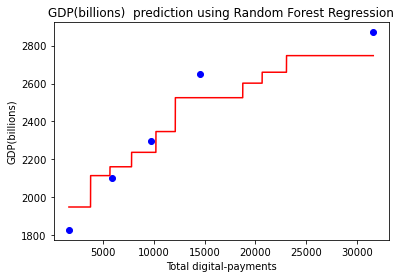

<Figure size 72x72 with 0 Axes>

In [43]:
''' Visualise the Random Forest Regression by creating range of values from min value of X_train to max value of X_train  
having a difference of 0.01 between two consecutive values'''
X_val = np.arange(min(X_train), max(X_train), 0.01) 
  
#Reshape the data into a len(X_val)*1 array in order to make a column out of the X_val values 
X_val = X_val.reshape((len(X_val), 1))  
  
#Define a scatter plot for training data 
plt.scatter(X_train, y_train, color = 'blue') 
  
#Plot the predicted data 
plt.plot(X_val, RFReg.predict(X_val), color = 'red')  
  
#Define the title 
plt.title('GDP(billions)  prediction using Random Forest Regression')  
  
#Define X axis label 
plt.xlabel('Total digital-payments') 
  
#Define Y axis label 
plt.ylabel('GDP(billions)') 

#Set the size of the plot for better clarity
plt.figure(figsize=(1,1))
  
#Draw the plot 
plt.show()

In [44]:
# Predicting GDP based on Totaldigital payments using Random Forest Regression 
GDP = RFReg.predict([[18639]])
print("The GDP to be predicted in 2020: % d"% GDP, "in Billions")

The GDP to be predicted in 2020:  2525 in Billions
